Boosting算法系列
===

# 1.Boosting算法
## 1.1.提升算法介绍
提升是一个机器学习技术，可以用于回归和分类问题，它每一步产生一个弱预测模型，如决策树，并加权累加到总模型中；如果每一步的弱预测模型生成都是依据损失函数的梯度方向，则称之为梯度提升Gradient boosting。梯度提升算法首先给定一个目标损失函数，它的定义域是所有可行的若函数集合(基函数)；提升算法通过迭代的选择一个负梯度方向上的基函数来逐渐逼近局部最小值。Boosting集合多个’base’分类器从而使它的性能比任何单个base分类器都好地多。即使base分类器的性能比随机猜测稍微好一点（因此base分类器也叫做weak learners），Boosting依旧会得到一个很好地预测结果。Boosting最初的目的是解决分类问题，现在它也可以解决回归问题。提升就是指每一步我都产生一个弱预测模型，然后加权累加到总模型中，然后每一步弱预测模型生成的的依据都是损失函数的负梯度方向，这样若干步以后就可以达到逼近损失函数局部最小值的目标

## 1.2.理论意义
如果一个问题存在弱分类器，则可以通过提升的办法得到强分类器

## 1.3.算法分类
提升算法主要包括GBDT、XGBoost以及AdaBoost三个

## 1.4.Boosting和Bagging的区别
Boosting的base分类器是按顺序训练的，训练每个base分类器时所使用的训练集是加权重的，而训练集中的每个样本的权重系数取决于前一个base分类器的性能。前一个base分类器错误分类的样本点，在下一个base分类器训练时会有一个更大的权重。一旦训练完所有的base分类器，我们组合所有的分类器给出最终的预测结果。最重要的区别是Bagging的每一个学习器都是独立的，不相关的；而Boosting的每个学习器都是根据上一个学习器学习而来的

## 1.5.Boosting算法总结
![images](Images/06_001.png)

- 给定初始训练数据，由此训练出第一个基学习器；
- 根据基学习器的表现对样本进行调整，在之前学习器做错的样本上投入更多关注；
- 用调整后的样本，训练下一个基学习器；
- 重复上述过程T次，将T个学习器加权结合

## 1.6.Boosting算法的三要素
![images](Images/06_002.png)

- 基学习器
- 组合方式
- 目标函数

# 2.Boosting算法的理论推导与加法模型
提升就是指每一步都产生一个弱预测模型，然后加权累加到总模型中，然后每一步弱预测模型生成的依据都是损失函数的负梯度方向(这样才能使得每一步都比前一步的损失小，从而使得最终的总预测模型的损失最小)，这样若干步以后就可以达到逼近损失函数局部最小值的目标，我们知道Boosting算法肯定是一个加法模型，它是由若干个基函数及其权值乘积之和的累加，即
$$f(x)=\sum_{m=1}^M\beta_mb(x;\gamma_m)$$
其中$b(x;\gamma_m)$是基函数，$\beta$是基函数的系数，也就是权重，$\gamma_m$为基函数的参数，这就是我们最终分类器的样子，现在的目标就是想办法使损失函数的期望取最小值，也就是
$$min_{\beta_m,\gamma_m}\sum_{i=1}^NL[y_i,\sum_{m=1}^m\beta_mb(x;\gamma_m)]$$
一下子对这M个分类器同时实行优化，显然不太现实，这问题也太复杂了，所以人们想了一个略微折中的办法，因为是加法模型，所以我每一步只对其中一个基函数及其系数进行求解，这样逐步逼近损失函数的最小值，也就是说
$$min_{\beta_m,\gamma_m}\sum_{i=1}^NL[y_i,f_{m-1}+\beta_mb(x;\gamma_m)]$$
要使损失函数最小，那就得使新加的这一项刚好等于损失函数的负梯度，这样不就一步一步使得损失函数最快下降了吗？没错，就是这样，那么就有了
$$\beta_mb(x;\gamma_m)=-\lambda\frac{\partial{L(y,f_{m-1})}}{\partial{f}}$$

# 3.前向分步算法
1. 初始化$f_0(x)=0$
2. 对于m=1,2,...,M有
$$
\begin{eqnarray}
(\beta_m,\gamma_m)=argmin_{\beta_m,\gamma_m}\sum_{i=1}^NL[y_i,\sum_{m=1}^m\beta_mb(x;\gamma_m)]\\
f_m(x)=f_{m-1}(x)+\beta_mb(x;\gamma_m)
\end{eqnarray}
$$

# 4.AdaBoost
## 4.1.推导
AdaBoost是个分类器，对于分类问题，需要引入指数损失，即
$$L[y,f(x)]=e^{-yf(x)}$$
令其基函数$b(x;\gamma)=G(x)$，所以有$G_m(x) \in [-1,1]$，则在指数损失的基础上，需要解决如下问题
$$(\beta_m,G_m)=argmin_{\beta,G}\sum_{i=1}^Ne^{-y_i[f_{m-1}(x_i)+\beta G(x_i)]}$$
令$\omega_i^{(m)}=e^{-y_if_{m-1}(x_i)}$，则有
$$(\beta_m,G_m)=argmin_{\beta,G}\sum_{i=1}^N\omega_i^{(m)}e^{-y_i\beta G(x_i)}$$
对于二分类问题，有如下规则
$$
\begin{eqnarray}
y_iG(x_i) &=& 1 & y_i = G(x_i)\\
y_iG(x_i) &=& -1 & y_i \neq G(x_i)
\end{eqnarray}
$$

所以有如下推导：
$$
\begin{eqnarray}
(\beta_m,G_m)&=&\sum_{i=1}^N\omega_i^{(m)}e^{-y_i\beta G(x_i)}\\
&=&e^{-\beta}\sum_{y_i=G(x_i)}\omega_i^{(m)}+e^{\beta}\sum_{y_i \neq G(x_i)}\omega_i^{(m)}\\
&=&e^{-\beta}\sum_{y_i=G(x_i)}\omega_i^{(m)}+e^{\beta}\sum_{y_i \neq G(x_i)}\omega_i^{(m)} + e^{-\beta}\sum_{y_i \neq G(x_i)}\omega_i^{(m)} - e^{-\beta}\sum_{y_i \neq G(x_i)}\omega_i^{(m)}\\
&=&(e^{\beta}-e^{-\beta})\sum_{y_i \neq G(x_i)}\omega_i^{(m)} + e^{-\beta}\sum_{i=1}^N\omega_i^{(m)}\\
&\because& \frac{\partial{e^{\beta}}}{\partial{\beta}} = e^{\beta} \\
&\because& \frac{\partial{e^{-\beta}}}{\partial{\beta}} = -e^{-\beta} \\
\Rightarrow \frac{\partial{L}}{\partial{\beta}} &=& e^{\beta}\sum_{y_i \neq G(x_i)}\omega_i^{(m)} + e^{-\beta}\sum_{y_i \neq G(x_i)}\omega_i^{(m)} - e^{-\beta}\sum_{i=1}^N\omega_i^{(m)}\\
\frac{\partial{L}}{\partial{\beta}} &=& 0 \\
&\Rightarrow& e^{\beta}\sum_{y_i \neq G(x_i)}\omega_i^{(m)} = e^{-\beta}\sum_{i=1}^N\omega_i^{(m)} - e^{-\beta}\sum_{y_i \neq G(x_i)}\omega_i^{(m)}\\
&\Rightarrow& e^{\beta}\sum_{y_i \neq G(x_i)}\omega_i^{(m)} = e^{-\beta}[\sum_{i=1}^N\omega_i^{(m)} - \sum_{y_i \neq G(x_i)}\omega_i^{(m)}]\\
&\Rightarrow& loge^{\beta}\sum_{y_i \neq G(x_i)}\omega_i^{(m)}=loge^{-\beta}[\sum_{i=1}^N\omega_i^{(m)} - \sum_{y_i \neq G(x_i)}\omega_i^{(m)}]\\
&\Rightarrow& loge^{\beta} + log\sum_{y_i \neq G(x_i)}\omega_i^{(m)} = loge^{-\beta} + log[\sum_{i=1}^N\omega_i^{(m)} - \sum_{y_i \neq G(x_i)}\omega_i^{(m)}]\\
&\Rightarrow& loge^{\beta} - loge^{-\beta} = log[\sum_{i=1}^N\omega_i^{(m)} - \sum_{y_i \neq G(x_i)}\omega_i^{(m)}] - log\sum_{y_i \neq G(x_i)}\omega_i^{(m)}\\
&\Rightarrow& \beta+\beta= log\frac{\sum_{i=1}^N\omega_i^{(m)} - \sum_{y_i \neq G(x_i)}\omega_i^{(m)}}{\sum_{y_i \neq G(x_i)}\omega_i^{(m)}}\\
&\Rightarrow& \beta=\frac{1}{2}log\frac{\sum_{i=1}^N\omega_i^{(m)} - \sum_{y_i \neq G(x_i)}\omega_i^{(m)}}{\sum_{y_i \neq G(x_i)}\omega_i^{(m)}}\\
&\Rightarrow& \beta=\frac{1}{2}log\frac{\frac{\sum_{i=1}^N\omega_i^{(m)}}{\sum_{i=1}^N\omega_i^{(m)}} - \frac{\sum_{y_i \neq G(x_i)}\omega_i^{(m)}}{\sum_{i=1}^N\omega_i^{(m)}}}{\frac{\sum_{y_i \neq G(x_i)}\omega_i^{(m)}}{\sum_{i=1}^N\omega_i^{(m)}}}\\
err &=& \frac{\sum_{y_i \neq G(x_i)}\omega_i^{(m)}}{\sum_{i=1}^N\omega_i^{(m)}}\\
&\Rightarrow& \beta=\frac{1}{2}log\frac{1-err}{err}
\end{eqnarray}
$$
我们可以看到err的分子是误差率，分母是所有样本概率和，那么err是加权的误差率，也可以说是对误差率的归一化。这样我们就求出了基函数在最终预测模型中的权重系数

## 4.2.输入
训练数据集$T=\{(x_1,y_1),(x_2,y_2),...,(x_N,y_N)\}$,其中$x_i \in X \subseteq R^n, y_i \in Y=\{-1,+1\}$；弱学习算法

## 4.3.输出
最终分类器$G(x)$

## 4.4.步骤
### 4.4.1.初始化训练数据的权重分布
$$D_i=(\omega_{11},...,\omega_{1i},...,\omega_{1N}),\omega_{1i}=\frac{1}{N}, i=1,2,...,N$$
假设训练数据集具有均匀的权值分布，即每个训练样本在基本分类器的学习中左右相同，这一假设保证这一步能够在原始数据上学习基本分类器$G_1(x)$

### 4.4.2.对$m=1,2,...,M$
AdaBoost反复学习基本分类器，在每一轮$m=1,2,...,M$顺次执行下列操作

- 使用具有权值分布$D_m$的训练数据集学习，得到基本分类器
$$G_m(x):X \rightarrow \{-1,+1\}$$

- 计算$G_m(x)$在训练数据集上的分类误差率
$$e_m=P[G_m(x_i)\neq y_i]=\sum_{i=1}^N\omega_{mi}I[G_m(x_i)\neq y_i]$$
其中
$$
I[G_m(x_i)\neq y_i]=\begin{cases}
1 & G_m(x_i) \neq y_i\\
0 & G_m(x_i) = y_i
\end{cases}
$$
这里，$\omega_{mi}$表示第m轮中第i个实例的权值，$\sum_{i=1}^N\omega_{mi}=1$。这表明，$G_m(x)$在加权的训练数据集上的分类误差率是被$G_m(x)$错误分类样本的权值之和，由此可以看出数据权值分布$D_m$与基本分类器$G_m(x)$的分类误差率的关系

- 计算$G_m(x)$的系数$\alpha_m$
$$\alpha_m=\frac{1}{2}log\frac{1-e_m}{e_m}$$
这里的对数是自然对数。$\alpha_m$表示$G_m(x)$在最终分类器中的重要性，有上述公式可知，当$e_m \leq \frac{1}{2}$时，$\alpha_m \geq 0$，并且$\alpha_m$随着$e_m$的减少而增大，所以分类误差率越小的基本分类器在最终分类器中的作用越大。这个$\alpha$是当前分类器在最终分类器中的权值

- 更新训练数据集的权值分布为下一轮做准备
$$
\begin{eqnarray}
D_{m+1}&=&(\omega_{m+1,1},...,\omega_{m+1,i},...,\omega_{m+1,N})\\
\omega_{m+1,i}&=&\frac{\omega_{mi}}{Z_m}e^{-\alpha_my_iG_m(x_i)},i=1,2,...,N
\end{eqnarray}
$$
其中，如果预测正确，那么$y_iG_m(x_i)=1$,否则就是-1。这里，$Z_m$是规范化因子,也就是为了归一化数据
$$Z_m=\sum_{i=1}^N\omega_{mi}e^{-\alpha_my_iG_m(x_i)}$$
它使得$D_{m+1}$称为一个概率分布。对于上述第二个式子，可以写成
$$
\omega_{m+1,i}=\begin{cases}
\frac{\omega_{mi}}{Z_m}e^{-\alpha_m} & G_m(x_i) = y_i\\\\
\frac{\omega_{mi}}{Z_m}e^{\alpha_m} & G_m(x_i) \neq y_i
\end{cases}
$$
由此可知，被基本分类器$G_m(x)$错误分类的样本的权值得以扩大，而被正确分类的样本的权值却得以缩小。两相比较，误分类样本的权值被放大$e^{2\alpha_m}=\frac{e_m}{1-e_m}$倍。因此，误分类样本在下一轮学习中起更大的作用。不改变所给的训练数据，而不断改变训练数据权值的分布，是的训练数据在基本分类器的学习中起不同的作用，这是AdaBoost的一个特点

### 4.4.3.构建基本分类器的线性组合
$$f(x)=\sum_{m=1}^M\alpha_mG_m(x)$$
得到最终分类器
$$G(x)=sign[f(x)]=sign[\sum_{m=1}^M\alpha_mG_m(x)]$$
线性组合$f(x)$实现M个基本分类器的加权表决。系数$\alpha_m$表示了基本分类器$G_m(x)$的重要性，这里，所有$\alpha_m$之和并不为1.$f(x)$的符号决定实例$x$的类，$f(x)$的绝对值表示分类的确信度。利用基本分类器的线性组合构建最终分类器是AdaBoost的另一特点。

### 4.4.4.需要注意的两点
#### 4.4.4.1.$e_m$和$\alpha_m$
首先需要明白的是如果没有任何基本分类器，单凭肉眼去分类，得到的分类误差率应该是0.5，那么有了基本分类器，$e_m$应该是小余0.5的，否则假如分类器没有任何意义，这也就是说$1-e_m > 0.5$，所以$\alpha_m > 0$的数，每次$e_m$越小，那么$\alpha_m$就越大。如果$e_m > 0.5$，那么得到的$\alpha_m$就是一个负值，那么相当于对于此时的分类器$G_m$，我们需要反向考虑。

#### 4.4.4.2.更新$\omega$
- 如果第i个样本我们分类错误了，也就是说$G_m(x_i) \neq y_i$，其中$G_m(x_i)$和$y_i$都是-1或者+1，如果分类错误了，那么$y_iG_m(x_i)$就是-1。
- 一般情况下,$\alpha_m > 0$
- 所以$-\alpha_my_iG_m(x_i)$是一个大于0的数，那么$e^{-\alpha_my_iG_m(x_i)} > 1$。
- 这就是说如果第i个样本分错了，下一个$\omega_{m+1,i}$就是上一个$\omega_{mi}$乘以一个大于1的数，相当于权值升高了。
- 反之如果分类分对了，权值就会下降

### 4.4.5.分类器误差率$e_m$对其权重$\alpha_m$的影响

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


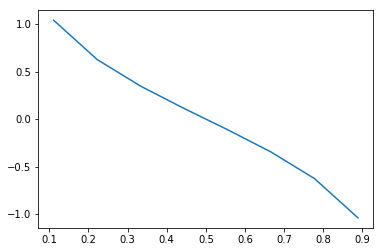

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

x = np.linspace(0, 1, num=10)
y = 1/2 * np.log((1-x) / x)

plt.figure(facecolor='w')
plt.plot(x, y)


从图中可以发现：
1. $e_m$为0.5时，其权重$\alpha_m$是0，表示此分类器在最终模型中不起任何作用
2. $e_m < 0.5$时其$\alpha_m > 0$，表示对最终模型起正向作用。$e_m$的值越小，起到的作用越大
3. $e_m > 0.5$时其$\alpha_m < 0$，表示对最终模型起负向作用。$e_m$的值越大，起到的负作用也越大
4. $e_m$不会出现等于0的情况，因为到了0的时候，弱分类器已经全部分正确，也就不需要更新权重再次训练了
5. $e_m$也不会出现等于1的情况，因为1表示弱分类器全错。

## 4.5.举例
给定下列训练样本，试用AdaBoost算法学习一个强分类器。

![images](Images/06_003.png)

假定我们给定一个线性分类器，是无法把它分开的

### 4.5.1.初始化
首先初始化训练数据的权值分布$D_1=\{\omega_{11},\omega_{12},...,\omega_{1i},...,\omega_{1N}\},\omega_{1i}=\frac{1}{N},i=1,2,...,N$，由于有10个样本，所以$\omega_{1i}=0.1$

### 4.5.2.第一轮(m=1)
我们需要根据样本训练出来一个基本分类器。由于样本很少，我们可以遍历一下

- 我们选择阀值V取2.5是误差率最低，那么基本分类器为
$G_1(x)=\begin{cases}
1, & x < 2.5\\\\
-1, & x > 2.5
\end{cases}$，那么我们可以看到只有样本6，7，8做错了
- $G_1(x)$训练集上的误差率$e_1=P(G_1(x_i)\neq y_i)=P(x=6,7,8)=0.1+0.1+0.1=0.3$。
- 计算$G_1$的系数$\alpha_1=\frac{1}{2}log\frac{1-e_1}{e_1}=\frac{1}{2}log(\frac{1-0.3}{0.3})=0.4236$，那么$f_1(x)=0.4236G_1(x)$，分类器$sign[f_1(x)]$在训练数据集上有3个错误分类点

- 更新$D_{m+1}$和$\omega_{m+1}$，其中
$$D_2=(0.0715,0.0715,0.0715,0.0715,0.0715,0.0715,,0.1666,0.1666,0.1666,0.0715)$$
这些数是怎么算出来的呢？我们知道公式如下
$$
\begin{eqnarray}
D_{m+1}&=&(\omega_{m+1,1},...,\omega_{m+1,i},...,\omega_{m+1,N})\\
\omega_{m+1,i}&=&\frac{\omega_{mi}}{Z_m}e^{-\alpha_my_iG_m(x_i)},i=1,2,...,N
\end{eqnarray}
$$
对于我们知道只有$6,7,8$(序号是7，8，9)三个样本分错了，所以$y_7G_7(x_7),y_8G_8(x_8),y_9G_9(x_9)$三个值是-1，其它7个样本的值为1，所以就有
$$
\begin{eqnarray}
Z_m&=&\sum_{i=1}^N\omega_{mi}e^{-\alpha_my_iG_m(x_i)}\\
&=&\frac{1}{10}e^{-0.4236 * 1} * 7 + \frac{1}{10}e^{-0.4236 * -1} * 3\\
&=&0.06546857038225139 * 7 + 0.15274504913751732 * 3\\
&=&0.9165151400883117
\end{eqnarray}
$$
那么有
$$
D_2=(\frac{0.06547}{0.9165},\frac{0.06547}{0.9165},\frac{0.06547}{0.9165},\frac{0.06547}{0.9165},\frac{0.06547}{0.9165},\frac{0.06547}{0.9165},\frac{0.15275}{0.9165},\frac{0.15275}{0.9165},\frac{0.15275}{0.9165},\frac{0.06547}{0.9165})
$$
看到了吧，第7，8，9号三个样本的权重比别的样本的权重大了，因为它们在这一轮预测错了

### 4.5.3.第2轮(m=2)
1. 阀值V为8.5误差率最低，故基本分类器为
$G_2(x)=\begin{cases}
1, & x < 8.5\\\\
-1, & x > 8.5
\end{cases}$，发现样本3，4，5做错了，那么$e_2=0.0715 * 3 =0.2143,\alpha_2=0.6496$
2. 更新$D_3=(0.0455,0.0455,0.0455,0.1667,0.1667,0.1667,0.1060,0.1060,0.1060,0.0455)$，这时$f_2(x)=0.4236G_1(x)+0.6496G_2(x)$，发现$sign[f_2(x)]$在训练集上有3个错误分类点

### 4.5.4.第3轮(m=3)
1. 阀值V为5.5是误差率最低，故基本分类器为
$G_3(x)=\begin{cases}
1, & x > 5.5\\\\
-1, & x < 5.5
\end{cases}$，发现样本0,1,2,9做错了，错误率就是$e_3=0.0455*4=0.1820$，计算$\alpha_3=0.7514$
2. 更新$D_4=(0.125,0.125,0.125,0.102,0.102,0.102,0.065,0.065,0.065,0.125)$，这时$f_3(x)=0.4236G_1(x)+0.6496G_2(x)+0.7514G_3(x)$。这是发现$sign[f_3(x)]$在训练集上有0个错误分类点。完美

## 4.6.收敛性
![images](Images/06_004.png)

![images](Images/06_005.png)

## 4.7.总结
AdaBoost使用的损失函数为指数函数
- 对异常点敏感:指数损失存在的一个问题是不断增加误分类样本的权重（指数上升）。如果数据样本是异常点（outlier），会极大的干扰后面基本分类器学习效果；
- 模型无法用于概率估计:对于取值$\widetilde{A}$的随机变量来说，$e^{-\widetilde{y}f}$不是任何概率密度函数的对数形式，模型$f(x)$的结果无法用概率解释

# 5.提升树(Boosting Tree)与梯度提升树(GBT-Gradient Boosting Tree)

## 5.1.概述
提升树分为梯度提升决策树GBDT和梯度提升回归树GBRT。提升树算法采用前向分布算法，首先确定初始提升树$f_0(x)=0$，第m步的模型是$$f_m(x)=f_{m-1}(x)+T(x;\Theta_m)$$其中，$f_{m-1}(x)$为当前模型，通过经验风险极小化确定下一棵决策树的参数$\Theta_m$$$\hat{\Theta_m}=argmin_{\Theta_m}\sum_{i=1}^NL(y_i,f_{m-1}(x_i)+T{x_i;\Theta_m})$$由于树的线性组合可以很好地拟合训练数据，即使数据中的输入与输出之间的关系很复杂也是如此，所以提升树是一个高功能的学习算法。根据前面的介绍我们了解到根据损失函数的不同分为4种不同的提升方法，包括平方损失函数的回归问题，用指数损失函数的分类问题以及用一般损失函数的一般决策问题。对于二分类问题，只需将AdaBoost算法中的基分类器显示为二分类决策树，就变成了用于二分类问题的提升树，可以说此时的提升树算法是AdaBoost算法的特殊情况。提升树是以决策树为基分类器的提升方法，通常使用CART树。针对不同问题的提升树学习算法，主要区别在于使用的损失函数不同。
- 分类问题：指数损失函数。可以使用CART分类树作为AdaBoost的基分类器，此时为分类提升树。
- 回归问题：平方误差损失函数。
- 决策问题：一般损失函数。

## 5.2.提升树的分类问题
对于基函数是分类树时，我们使用指数损失函数，此时正是AdaBoost算法的特殊情况，即将AdaBoost算法中的基分类器使用分类树即可

## 5.3.提升树的回归问题
对于基函数是回归树时，我们使用平方差损失函数(残差)，第m棵树的参数为：
$$\hat{\Theta_m}=argmin_{\Theta_m}\sum_{i=1}^NL(y_i,f_{m-1}(x_i)+T{x_i;\Theta_m})$$
平方误差损失函数为
$$L(y,f(x))=(y-f(x))^2$$
那么损失函数就变成了
$$
\begin{eqnarray}
L(y,f_{m-1}(x)+T(x;\Theta_m))&=&[y-f_{m-1}(x)-T(x;\Theta_m)]^2\\
&=&[r-T(x;\Theta_m)]^2
\end{eqnarray}
$$
这里$r=y-f_{m-1}(x)$,可以看到，r时当前模型拟合数据的残差(residual)，随意，对回归问题的提升树算法来说，只需简单的拟合当前模型的残差，这样算法是相当简单的

![images](Images/06_006.png)

## 5.4.提升树的决策问题-GBDT(梯度提升决策树Gradient Boosting Decision Tree)
提升树利用加法模型与前向分步算法实现学习的优化过程，当损失函数是平方损失和指数损失函数时，每一步的优化是很简单的，但对一般损失函数而言，往往每一步优化并不是十分容易，所以提出了梯度提升算法，这是利用最速下降法的近似方法，其关键是利用损失函数的负梯度
$$F_0(\overrightarrow{x})=argmin_{\gamma}\sum_{i=1}^nL(y_i,\gamma)$$
对于m=1到M
- 计算伪残差$\gamma_{im}=[\frac{\partial{L(y_i,F(\overrightarrow{x_i}))}}{\partial{F(\overrightarrow{x_i})}}]\_{F(\overrightarrow{x})=F_{m-1}(\overrightarrow{x})}$, i=1,2,...,n
- 使用数据$(\overrightarrow{x_i}, \gamma_{im})_{i=1}^n$计算拟合残差的基函数$f_m(x)$
- 计算步长$\gamma_m=argmin_{\gamma}\sum_{i=1}^nL(y_i,F_{m-1}(\overrightarrow{x_i})-\gamma \bullet f_m(\overrightarrow{x_i}))$，这是一个一维优化问题
- 更新模型$F_m(\overrightarrow{x})=F_{m-1}(\overrightarrow{x})-\gamma_mf_m(\overrightarrow{x_i})$


# 6.提升树的更高级形式-XGBoost(Extreme Gradient Boosting)
对于梯度提升树，我们只考虑了一阶导数的形式，如果我们考虑二阶导数，那么就变成了效果更好的XGBoost

## 6.1.XGBoost的模型-树集成(tree ensembles)
树集成模型是一组CART(classification and regression trees)树。下面是一个CART的简单实例，它可以分类是否有人喜欢电脑游戏

![images](Images/06_007.png)

我们把一个家庭的成员分成不同的叶子，并把他们分配到相应的叶子节点上。CART与decision trees（决策树）有些许的不同，就是叶子只包含决策值。在CART中，每个叶子都有一个real score（真实的分数），这给了我们更丰富的解释，超越了分类。 这也使得统一的优化步骤更容易。通常情况下，单棵树由于过于简单而不够强大到可以支持在实践中使用的。实际使用的是所谓的tree ensemble model（树集成模型），它将多棵树的预测加到一起。

![images](Images/06_008.png)

上图是两棵树的集成的例子。将每棵树的预测分数加起来得到最终分数。 如果你看一下这个例子，一个重要的事实就是两棵树互相complement（补充）。在数学表示上，我们可以在表单中编写我们的模型
$$
\hat{y}\_i=\sum_{k=1}^Kf_k(x_i),f_k \in F
$$
其中K是树的数量，f是函数空间F的函数，F是所有可能的CARTs的集合，所以我们优化的目标可以写成
$$
obj(\Theta)=\sum_i^nl(y_i,\hat{y}\_i)+\sum_{k=1}^K\Omega(f_k)
$$
那么问题来了，随机森林的模型其实也是树集成，所以随机森林和提升树在模型上并没有不同，不同之处在于我们如何训练他们

## 6.2.概述
使用一阶导总是会涉及到学习率$\gamma$，我们考虑二阶导。假设有样本X:$\{\overrightarrow{x_1},\overrightarrow{x_2},...,\overrightarrow{x_m}\}$，以及对应的Y个真实值$\{y_1,y_2,....,y_m\}$。目前我们已经找到了t-1个决策树
$$\{T_1,T_2,...,T_{t-1}\}$$
以及对应的t-1个学习率
$$\{\alpha_1,\alpha_2,...,\alpha_{t-1}\}$$
那么对于任意一个样本$\overrightarrow{x_i}$，我们总能算出一个预测值
$$\hat{y_i}=\alpha_1T_1(x_i)+\alpha_2T_2(x_i)+...+\alpha_{t-1}T_{t-1}(x_i)$$
我们使用符号$\hat{y}\_{t-1}^{(i)}$来表示使用t-1棵决策树计算出来的第i个样本的预测值，那么我们就有了一组数据
$$\{(x^{(1)}, \hat{y}\_{t-1}^{(1)}), (x^{(2)}, \hat{y}\_{t-1}^{(2)}),...,(x^{(m)}, \hat{y}_{t-1}^{(m)})\}$$
现在我们要考虑的是怎么计算$T_t(X)$以及$\alpha_t$

## 6.3.Taylor展式
$$f(x+\Delta{x}) \approx f(x)+f'(x)\Delta{x}+\frac{1}{2}f''(x)\Delta{x}^2$$
我们可以看出来$\hat{y}\_{t-1}^{(i)}$相当于Taylor展式中的x，$f_t(x_i)$相当于$\Delta{x}$。令
$$g_i=\frac{\partial{L(y_i, \hat{y}\_{t-1}^{(i)})}}{\partial{\hat{y}\_{t-1}^{(i)}}},h_i=\frac{\partial^2{L(y_i, \hat{y}\_{t-1}^{(i)})}}{\partial{\hat{y}\_{t-1}^{(i)}}}$$
由于$\hat{y}\_{t-1}^{(i)}$是可以计算出来的，损失函数L是已知的，所以$g_i,h_i$是可以提前计算出来的，所有就有
$$J(f_t) \approx \sum_{i=1}^n[L(y_i, \hat{y}_{t-1}^{(i)})+g_if_t(x_i)+\frac{1}{2}h_if_t^2(x_i)]+\Omega{(f_t)}+C$$

## 6.4.总结
- 传统GBDT以CART作为基分类器，xgboost还支持线性分类器，这个时候xgboost相当于带L1和L2正则化项的逻辑斯蒂回归（分类问题）或者线性回归（回归问题）
- 传统GBDT在优化时只用到一阶导数信息，xgboost则对代价函数进行了二阶泰勒展开，同时用到了一阶和二阶导数。顺便提一下，xgboost工具支持自定义代价函数，只要函数可一阶和二阶求导
- xgboost在代价函数里加入了正则项，用于控制模型的复杂度。正则项里包含了树的叶子节点个数、每个叶子节点上输出的score的L2模的平方和。从Bias-variance tradeoff角度来讲，正则项降低了模型variance，使学习出来的模型更加简单，防止过拟合，这也是xgboost优于传统GBDT的一个特性 
- 在每一步tree boosting之后增加了一个参数n（权重），通过这种方式来减小每棵树的影响力，给后面的树提供空间去优化模型
- 列(特征)抽样，说是从随机森林那边学习来的，防止过拟合的效果比传统的行抽样还好（行抽样功能也有），并且有利于后面提到的并行化处理算法
- 并行化处理

# 7.AdaBoost实例

## 7.1.使用AdaBoost对鸢尾花进行分类

{'learning_rate': 0.1, 'n_estimators': 100}
Score: 0.7333333333333333
准确度: 73.33%


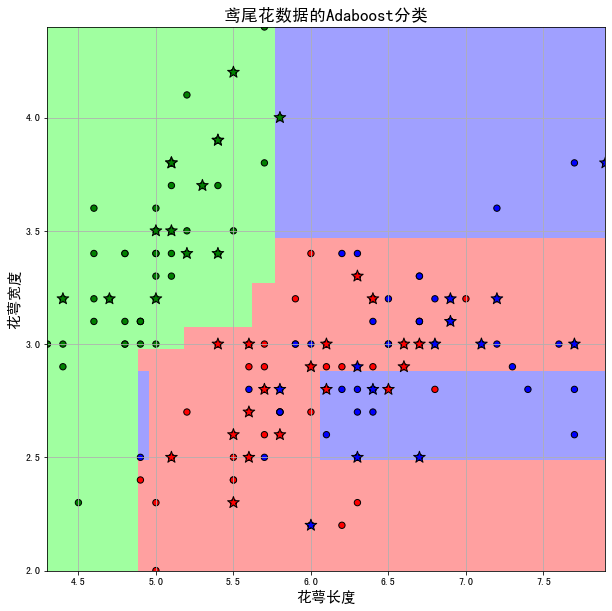

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
import os

data_path = os.path.join("data")
# 花萼长度、花萼宽度，花瓣长度，花瓣宽度
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

data = pd.read_csv(os.path.join(data_path, 'iris.data'), header=None)
x = data[np.arange(4)]
y = pd.Categorical(data[4]).codes

x = x.iloc[:, :2]# 为了可视化，仅使用前两列特征
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 决策树参数估计
base_estimator=[LogisticRegression()]
max_depth = np.arange(1, 10)
algorithm=['SAMME','SAMME.R']
learning_rate = [0.1, 0.5, 1]
n_estimators = [50, 100, 150, 200]
params_list = dict(learning_rate=learning_rate, n_estimators = n_estimators)
cv = StratifiedKFold(4)
cv.get_n_splits(x_train, y_train)

model = GridSearchCV(AdaBoostClassifier(), param_grid=params_list, cv=cv)
model.fit(x_train, y_train)
y_test_hat = model.predict(x_test)      # 测试数据
print(model.best_params_)
print('Score:', model.score(x_test, y_test))

# 画图
N, M = 50,50 # 横纵各采样多少个值
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_show_hat = model.predict(x_show)  # 预测值
y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
plt.figure(figsize=(10,10),facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(x_test[0], x_test[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=cm_dark, marker='*')  # 测试数据
plt.scatter(x[0], x[1], c=y.ravel(), edgecolors='k', s=40, cmap=cm_dark)  # 全部数据
plt.xlabel(iris_feature[0], fontsize=15)
plt.ylabel(iris_feature[1], fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的Adaboost分类', fontsize=17)

# 训练集上的预测结果
y_test = y_test.reshape(-1)
result = (y_test_hat == y_test)   # True则预测正确，False则预测错误
acc = np.mean(result)
print('准确度: %.2f%%' % (100 * acc))

## 7.2.AdaBoost进行曲线回归

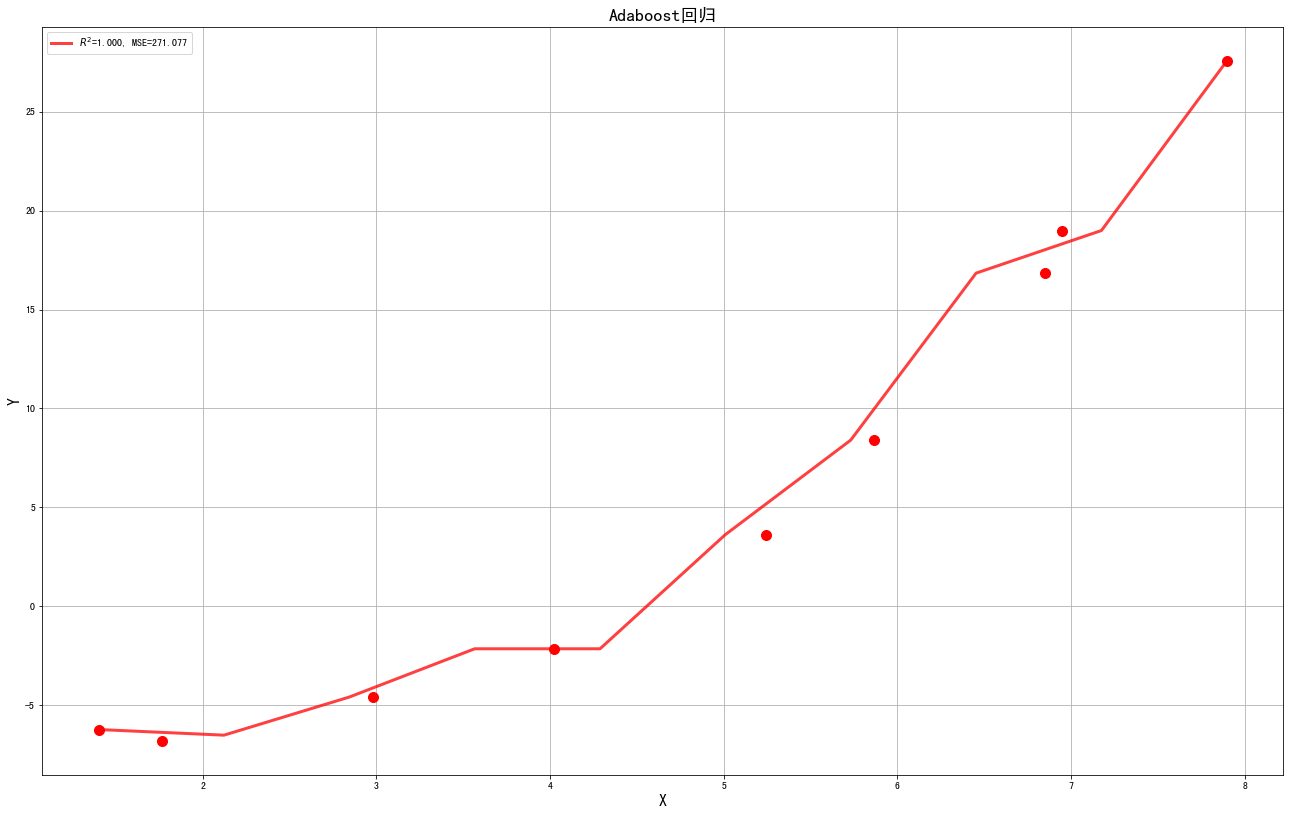

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import AdaBoostRegressor

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

np.random.seed(0)
np.set_printoptions(linewidth=1000)
N = 9
x = np.linspace(0, 8, N) + np.random.randn(N)
x = np.sort(x)
y = x**2 - 4*x - 3 + np.random.randn(N)
x.shape = -1, 1
y.shape = -1, 1

deep_length = 1
model = AdaBoostRegressor(n_estimators=100)
clrs = []  # 颜色
for c in np.linspace(16711680, 255, deep_length):
    clrs.append("#{:06X}".format(int(c), 2))
d_pool = np.arange(1, deep_length + 1, 1)  # 阶

label = 'Adaboost回归'

plt.figure(figsize=(18, 12), facecolor='w')
plt.plot(x, y, 'ro', ms=10, zorder=N)

for i, d in enumerate(d_pool):
    #model.set_params(max_depth=d)
    model.fit(x, y.ravel())

    x_hat = np.linspace(x.min(), x.max(), num=10)
    x_hat.shape = -1, 1
    y_hat = model.predict(x_hat)
    s = model.score(x, y)
    mse = np.average((y_hat - np.array(y)) ** 2)
    label1 = u'$R^2$=%.3f, MSE=%.3f' % (s, mse)
    plt.plot(x_hat, y_hat, color=clrs[i], lw=3, alpha=0.75, label=label1)

plt.legend(loc='upper left')
plt.grid(True)
plt.title(label, fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)

plt.tight_layout(1, rect=(0, 0, 1, 0.95))

# 8.梯度提升树-GBDT

## 8.1.对鸢尾花数据进行分类

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200}
得分:75.56


Text(0.5, 1.0, '鸢尾花数据的GDBT分类')

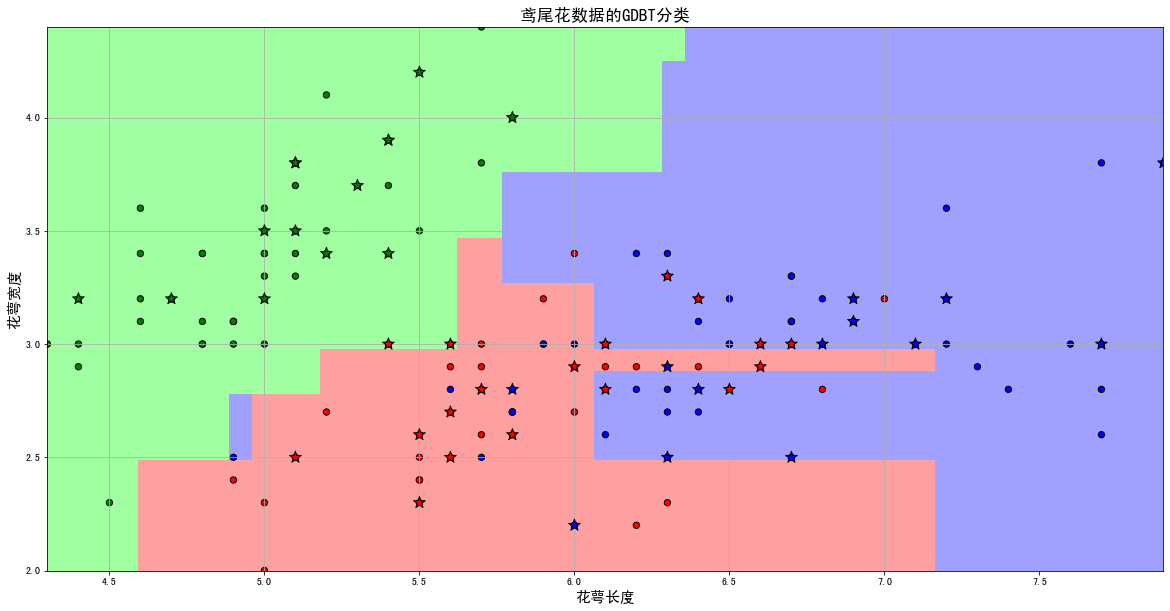

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import os

data_path = os.path.join("data")
# 花萼长度、花萼宽度，花瓣长度，花瓣宽度
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

data = pd.read_csv(os.path.join(data_path, 'iris.data'), header=None)
x = data[np.arange(4)]
y = pd.Categorical(data[4]).codes

x = x.iloc[:, :2]# 为了可视化，仅使用前两列特征
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 决策树参数估计
max_depth = np.arange(1, 10)
learning_rate = [0.1, 0.5, 1]
n_estimators = [50, 100, 150, 200]
params_list = dict(max_depth = max_depth, learning_rate=learning_rate, n_estimators = n_estimators)
cv = StratifiedKFold(4)
cv.get_n_splits(x_train,y_train)

model = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid=params_list, cv=cv)
#使用信息熵来划分子树，gini：使用gini系数划分子树
model.fit(x_train, y_train)
y_test_hat = model.predict(x_test)      # 测试数据
print(model.best_params_)
print('得分:%.2f' % (100 * model.score(x_test, y_test)))
# 画图
N, M = 50,50 # 横纵各采样多少个值
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_show_hat = model.predict(x_show)  # 预测值
y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
plt.figure(figsize=(20,10), facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(x_test[0], x_test[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=cm_dark, marker='*')  # 测试数据
plt.scatter(x[0], x[1], c=y.ravel(), edgecolors='k', s=40, cmap=cm_dark)  # 全部数据
plt.xlabel(iris_feature[0], fontsize=15)
plt.ylabel(iris_feature[1], fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的GDBT分类', fontsize=17)

准确度: 75.56%
1  错误率: 28.89%
2  错误率: 35.56%
3  错误率: 37.78%
4  错误率: 33.33%
5  错误率: 33.33%
6  错误率: 35.56%
7  错误率: 33.33%
8  错误率: 35.56%
9  错误率: 35.56%
10  错误率: 35.56%
11  错误率: 37.78%
12  错误率: 35.56%
13  错误率: 35.56%
14  错误率: 35.56%


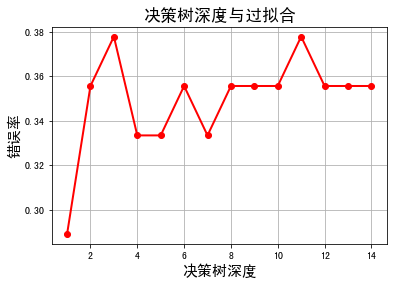

In [6]:
# 训练集上的预测结果
y_test = y_test.reshape(-1)
result = (y_test_hat == y_test)   # True则预测正确，False则预测错误
acc = np.mean(result)
print('准确度: %.2f%%' % (100 * acc))

# 过拟合：错误率
depth = np.arange(1, 15)
err_list = []
for d in depth:
    clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=d, random_state=0)
    clf.fit(x_train, y_train)
    y_test_hat = clf.predict(x_test)  # 测试数据
    result = (y_test_hat == y_test)  # True则预测正确，False则预测错误

    err = 1 - np.mean(result)
    err_list.append(err)
    print(d, ' 错误率: %.2f%%' % (100 * err))
plt.plot(depth, err_list, 'ro-', lw=2)
plt.xlabel(u'决策树深度', fontsize=15)
plt.ylabel(u'错误率', fontsize=15)
plt.title(u'决策树深度与过拟合', fontsize=17)
plt.grid(True)

## 8.2.进行曲线回归

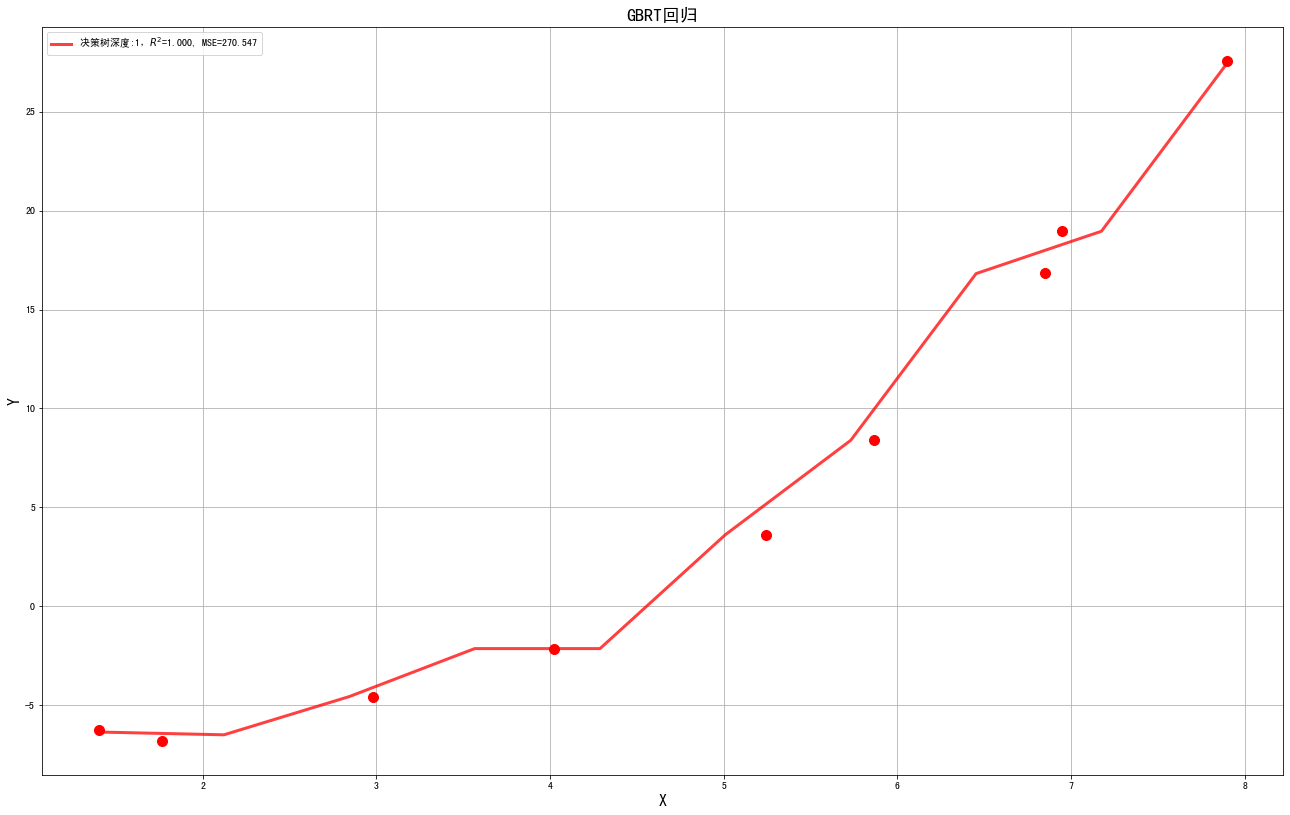

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

np.random.seed(0)
np.set_printoptions(linewidth=1000)
N = 9
x = np.linspace(0, 8, N) + np.random.randn(N)
x = np.sort(x)
y = x**2 - 4*x - 3 + np.random.randn(N)
x.shape = -1, 1
y.shape = -1, 1

deep_length = 1
model = GradientBoostingRegressor(n_estimators=100)
clrs = []  # 颜色
for c in np.linspace(16711680, 255, deep_length):
    clrs.append("#{:06X}".format(int(c), 2))
d_pool = np.arange(1, deep_length + 1, 1)  # 阶

label = 'GBRT回归'

plt.figure(figsize=(18, 12), facecolor='w')
plt.plot(x, y, 'ro', ms=10, zorder=N)

for i, d in enumerate(d_pool):
    model.set_params(max_depth=d)
    model.fit(x, y.ravel())

    x_hat = np.linspace(x.min(), x.max(), num=10)
    x_hat.shape = -1, 1
    y_hat = model.predict(x_hat)
    s = model.score(x, y)
    mse = np.average((y_hat - np.array(y)) ** 2)
    label1 = u'决策树深度:%d，$R^2$=%.3f, MSE=%.3f' % (d, s, mse)
    plt.plot(x_hat, y_hat, color=clrs[i], lw=3, alpha=0.75, label=label1)

plt.legend(loc='upper left')
plt.grid(True)
plt.title(label, fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.tight_layout(1, rect=(0, 0, 1, 0.95))

# 9.使用Python Code实现梯度提升树

In [8]:
import numpy as np
import math

class DecisionNode():
    def __init__(self, feature_i=None, threshold=None,value=None, true_branch=None, false_branch=None):
        self.feature_i = feature_i
        self.threshold = threshold
        self.value = value
        self.true_branch = true_branch
        self.false_branch = false_branch

class DecisionTree(object):
    def __init__(self, min_samples_split=2, min_impurity=1e-7,max_depth=float("inf"), loss=None):
        self.root = None  #根节点
        self.min_samples_split = min_samples_split
        self.min_impurity = min_impurity
        self.max_depth = max_depth
        # 计算值 如果是分类问题就是信息增益，回归问题就基尼指数
        self._impurity_calculation = None
        self._leaf_value_calculation = None #计算叶子
        self.one_dim = None
        self.loss = loss

    def fit(self, X, y, loss=None):
        self.one_dim = len(np.shape(y)) == 1
        self.root = self._build_tree(X, y)
        self.loss=None

    def _build_tree(self, X, y, current_depth=0):
        """
        递归求解树
        """
        largest_impurity = 0
        best_criteria = None
        best_sets = None

        if len(np.shape(y)) == 1:
            y = np.expand_dims(y, axis=1)

        Xy = np.concatenate((X, y), axis=1)

        n_samples, n_features = np.shape(X)

        if n_samples >= self.min_samples_split and current_depth <= self.max_depth:
            # 计算每一个特征的增益值
            for feature_i in range(n_features):
                feature_values = np.expand_dims(X[:, feature_i], axis=1)
                unique_values = np.unique(feature_values)

                for threshold in unique_values:
                    Xy1, Xy2 = self.divide_on_feature(Xy, feature_i, threshold)

                    if len(Xy1) > 0 and len(Xy2) > 0:
                        y1 = Xy1[:, n_features:]
                        y2 = Xy2[:, n_features:]

                        # 计算增益值
                        impurity = self._impurity_calculation(y, y1, y2)

                        if impurity > largest_impurity:
                            largest_impurity = impurity
                            best_criteria = {"feature_i": feature_i, "threshold": threshold}
                            best_sets = {
                                "leftX": Xy1[:, :n_features],
                                "lefty": Xy1[:, n_features:],
                                "rightX": Xy2[:, :n_features],
                                "righty": Xy2[:, n_features:]
                            }

        if largest_impurity > self.min_impurity:
            true_branch = self._build_tree(best_sets["leftX"], best_sets["lefty"], current_depth + 1)
            false_branch = self._build_tree(best_sets["rightX"], best_sets["righty"], current_depth + 1)
            return DecisionNode(feature_i=best_criteria["feature_i"], threshold=best_criteria[
                "threshold"], true_branch=true_branch, false_branch=false_branch)

        # 计算节点的目标值
        leaf_value = self._leaf_value_calculation(y)

        return DecisionNode(value=leaf_value)

    def predict_value(self, x, tree=None):
        """
        预测
        """
        if tree is None:
            tree = self.root

        if tree.value is not None:
            return tree.value

        feature_value = x[tree.feature_i]

        branch = tree.false_branch
        if isinstance(feature_value, int) or isinstance(feature_value, float):
            if feature_value >= tree.threshold:
                branch = tree.true_branch
        elif feature_value == tree.threshold:
            branch = tree.true_branch

        return self.predict_value(x, branch)

    def divide_on_feature(self, X, feature_i, threshold):
        split_func = None
        if isinstance(threshold, int) or isinstance(threshold, float):
            split_func = lambda sample: sample[feature_i] >= threshold
        else:
            split_func = lambda sample: sample[feature_i] == threshold

        X_1 = np.array([sample for sample in X if split_func(sample)])
        X_2 = np.array([sample for sample in X if not split_func(sample)])

        return np.array([X_1, X_2])

    def predict(self, X):
        y_pred = []
        for x in X:
            y_pred.append(self.predict_value(x))
        return y_pred

def calculate_entropy(y):
    log2 = math.log2
    unique_labels = np.unique(y)
    entropy = 0
    for label in unique_labels:
        count = len(y[y == label])
        p = count / len(y)
        entropy += -p * log2(p)
    return entropy

## 9.1.分类

In [9]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def calculate_variance(X):
    mean = np.ones(np.shape(X)) * X.mean(0)
    n_samples = np.shape(X)[0]
    variance = (1 / n_samples) * np.diag((X - mean).T.dot(X - mean))

    return variance

class RegressionTree(DecisionTree):
    def _calculate_variance_reduction(self, y, y1, y2):
        var_tot = calculate_variance(y)
        var_1 = calculate_variance(y1)
        var_2 = calculate_variance(y2)
        frac_1 = len(y1) / len(y)
        frac_2 = len(y2) / len(y)

        # 使用方差缩减
        variance_reduction = var_tot - (frac_1 * var_1 + frac_2 * var_2)

        return sum(variance_reduction)

    def _mean_of_y(self, y):
        value = np.mean(y, axis=0)
        return value if len(value) > 1 else value[0]

    def fit(self, X, y):
        self._impurity_calculation = self._calculate_variance_reduction
        self._leaf_value_calculation = self._mean_of_y
        super(RegressionTree, self).fit(X, y)

class GradientBoosting(object):
    def __init__(self, n_estimators, learning_rate, min_samples_split,
                 min_impurity, max_depth, regression):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.min_samples_split = min_samples_split
        self.min_impurity = min_impurity
        self.max_depth = max_depth
        self.regression = regression

        self.loss = CrossEntropy()

        self.trees = []
        for _ in range(n_estimators):
            tree = RegressionTree(
                min_samples_split=self.min_samples_split,
                min_impurity=min_impurity,
                max_depth=self.max_depth)
            self.trees.append(tree)

    def fit(self, X, y):
        y_pred = np.full(np.shape(y), np.mean(y, axis=0))
        for i in range(self.n_estimators):
            gradient = self.loss.gradient(y, y_pred)
            self.trees[i].fit(X, gradient)
            update = self.trees[i].predict(X)
            # Update y prediction
            y_pred -= np.multiply(self.learning_rate, update)

    def predict(self, X):
        y_pred = np.array([])
        for tree in self.trees:
            update = tree.predict(X)
            update = np.multiply(self.learning_rate, update)
            y_pred = -update if not y_pred.any() else y_pred - update

        if not self.regression:
            y_pred = np.exp(y_pred) / np.expand_dims(np.sum(np.exp(y_pred), axis=1), axis=1)
            y_pred = np.argmax(y_pred, axis=1)
        return y_pred

class Loss(object):
    def loss(self, y_true, y_pred):
        return NotImplementedError()

    def gradient(self, y, y_pred):
        raise NotImplementedError()

    def acc(self, y, y_pred):
        return 0

class CrossEntropy(Loss):
    def __init__(self): pass

    def loss(self, y, p):
        # Avoid division by zero
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return - y * np.log(p) - (1 - y) * np.log(1 - p)

    def acc(self, y, p):
        return accuracy_score(np.argmax(y, axis=1), np.argmax(p, axis=1))

    def gradient(self, y, p):
        # Avoid division by zero
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return - (y / p) + (1 - y) / (1 - p)



class GradientBoostingClassifier(GradientBoosting):
    def __init__(self, n_estimators=200, learning_rate=.5, min_samples_split=2,
                 min_info_gain=1e-7, max_depth=2, debug=False):
        super(GradientBoostingClassifier, self).__init__(n_estimators=n_estimators,
                                                         learning_rate=learning_rate,
                                                         min_samples_split=min_samples_split,
                                                         min_impurity=min_info_gain,
                                                         max_depth=max_depth,
                                                         regression=False)

    def fit(self, X, y):
        y = to_categorical(y)
        super(GradientBoostingClassifier, self).fit(X, y)
def to_categorical(x, n_col=None):
    """ One-hot encoding of nominal values """
    if not n_col:
        n_col = np.amax(x) + 1
    one_hot = np.zeros((x.shape[0], n_col))
    one_hot[np.arange(x.shape[0]), x] = 1
    return one_hot

data = datasets.load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9666666666666667


## 9.2.回归

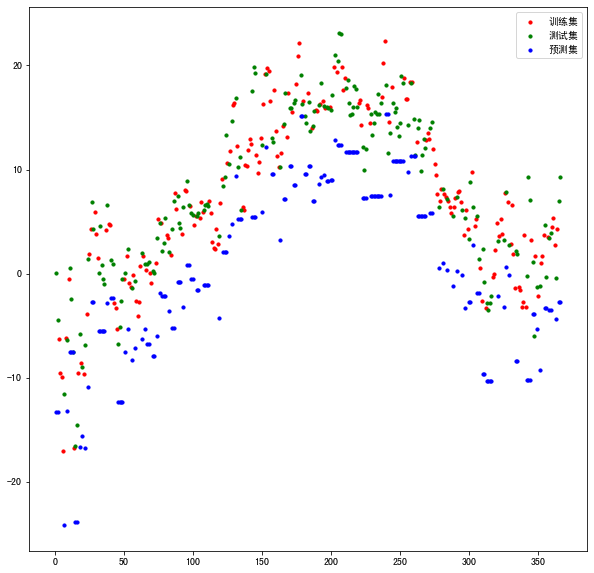

In [12]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import matplotlib as mpl
import os

data_path = os.path.join("data")
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

def calculate_variance(X):
    mean = np.ones(np.shape(X)) * X.mean(0)
    n_samples = np.shape(X)[0]
    variance = (1 / n_samples) * np.diag((X - mean).T.dot(X - mean))

    return variance
class RegressionTree(DecisionTree):
    def _calculate_variance_reduction(self, y, y1, y2):
        var_tot = calculate_variance(y)
        var_1 = calculate_variance(y1)
        var_2 = calculate_variance(y2)
        frac_1 = len(y1) / len(y)
        frac_2 = len(y2) / len(y)

        # 使用方差缩减
        variance_reduction = var_tot - (frac_1 * var_1 + frac_2 * var_2)

        return sum(variance_reduction)

    def _mean_of_y(self, y):
        value = np.mean(y, axis=0)
        return value if len(value) > 1 else value[0]

    def fit(self, X, y):
        self._impurity_calculation = self._calculate_variance_reduction
        self._leaf_value_calculation = self._mean_of_y
        super(RegressionTree, self).fit(X, y)

class GradientBoosting(object):
    def __init__(self, n_estimators, learning_rate, min_samples_split,
                 min_impurity, max_depth, regression):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.min_samples_split = min_samples_split
        self.min_impurity = min_impurity
        self.max_depth = max_depth
        self.regression = regression

        self.loss = SquareLoss()

        self.trees = []
        for _ in range(n_estimators):
            tree = RegressionTree(
                min_samples_split=self.min_samples_split,
                min_impurity=min_impurity,
                max_depth=self.max_depth)
            self.trees.append(tree)

    def fit(self, X, y):
        y_pred = np.full(np.shape(y), np.mean(y, axis=0))
        for i in range(self.n_estimators):
            gradient = self.loss.gradient(y, y_pred)
            self.trees[i].fit(X, gradient)
            update = self.trees[i].predict(X)
            # Update y prediction
            y_pred -= np.multiply(self.learning_rate, update)

    def predict(self, X):
        y_pred = np.array([])
        for tree in self.trees:
            update = tree.predict(X)
            update = np.multiply(self.learning_rate, update)
            y_pred = -update if not y_pred.any() else y_pred - update

        if not self.regression:
            y_pred = np.exp(y_pred) / np.expand_dims(np.sum(np.exp(y_pred), axis=1), axis=1)
            y_pred = np.argmax(y_pred, axis=1)
        return y_pred

class Loss(object):
    def loss(self, y_true, y_pred):
        return NotImplementedError()

    def gradient(self, y, y_pred):
        raise NotImplementedError()

    def acc(self, y, y_pred):
        return 0

class SquareLoss(Loss):
    def __init__(self): pass

    def loss(self, y, y_pred):
        return 0.5 * np.power((y - y_pred), 2)

    def gradient(self, y, y_pred):
        return -(y - y_pred)

class GradientBoostingRegressor(GradientBoosting):
    def __init__(self, n_estimators=200, learning_rate=0.5, min_samples_split=2,
                 min_var_red=1e-7, max_depth=4, debug=False):
        super(GradientBoostingRegressor, self).__init__(n_estimators=n_estimators,
                                                        learning_rate=learning_rate,
                                                        min_samples_split=min_samples_split,
                                                        min_impurity=min_var_red,
                                                        max_depth=max_depth,
                                                        regression=True)

data = pd.read_csv(os.path.join(data_path, 'MyData.txt'), sep="\t")
time = np.atleast_2d(data["time"].values).T
temp = np.atleast_2d(data["temp"].values).T

X = time.reshape((-1, 1))               # Time. Fraction of the year [0, 1]
X = np.insert(X, 0, values=1, axis=1)   # Insert bias term
y = temp[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred_line = model.predict(X)
mse = mean_squared_error(y_test, y_pred)
plt.figure(figsize=(10,10), facecolor='w')

m1 = plt.scatter(366 * X_train[:, 1],y_train, c='r',s=10, label=u'训练集')
m2 = plt.scatter(366 * X_test[:, 1], y_test,c='g',s=10, label=u'测试集')
m3 = plt.scatter(366 * X_test[:, 1], y_pred,c='b',s=10, label=u'预测集')
plt.legend(loc='best')